## Summary


In [103]:
# Import libraries
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.model_selection import train_test_split


---

Density


In [144]:
# Import density related dataframe
df = pd.read_csv("../../data/density_train_df.csv")
df.head()


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,2,0,NaN,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,2,0,NaN,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,2,0,NaN,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,2,0,NaN,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0,0,NaN,True


In [145]:
# Get density non null rows
density_df = df[~df["density"].isna()]
# Get density null rows
null_density_df = df[df["density"].isna()]


In [146]:
# Check if density non null rows missing any other values
density_df.isna().sum()


site_id                    0
patient_id                 0
image_id                   0
laterality                 0
view                       0
age                        0
cancer                     0
biopsy                     0
invasive                   0
BIRADS                     0
implant                    0
density                    0
difficult_negative_case    0
dtype: int64

In [147]:
# Check density null rows
null_density_df.isna().sum()


site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                            0
cancer                         0
biopsy                         0
invasive                       0
BIRADS                         0
implant                        0
density                    25236
difficult_negative_case        0
dtype: int64

In [148]:
# Train test split density dataframe for non null density rows
df_train, df_test = train_test_split(density_df, random_state=42, test_size=0.3)
# Prepare dataframe to predict null density dataframe
df_to_predict = null_density_df


In [150]:
# Save dataframes into csv files
df_train.to_csv("../../data/density_train.csv", index=False)
df_test.to_csv("../../data/density_test.csv", index=False)
df_to_predict.to_csv("../../data/predict_density_df.csv", index=False)


In [110]:
# Read no duplicate patient dataframe
df = pd.read_csv("../../data/no_dubs_train.csv")

df.head(1)


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,difficult_negative_case,custom_id
0,1,29919,1361547019,1,0,58.0,1,1,1,0,0,1,False,29919-R


In [111]:
# Prepare X and y for no duplicate patient dataframe
X = df[["patient_id", "image_id", "laterality", "view", "age"]]
y = df["cancer"]


---

Under Sampling


In [112]:
# Initialize Near Miss object
nm = NearMiss()
# Fit and resample X and y prepared to under sample
X_nm, y_nm = nm.fit_resample(X, y)

# Check under sampling
print("Original dataset shape:", Counter(y))
print("Resample dataset shape:", Counter(y_nm))


Counter({0: 53475, 1: 1156})
Original dataset shape: Counter({0: 53475, 1: 1156})
Resample dataset shape: Counter({0: 1156, 1: 1156})


Counter({1: 1156, 0: 53475})

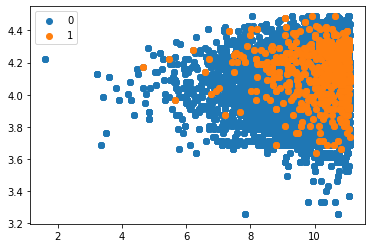

In [113]:
# Set up counter before under sampling
counter = Counter(y)
# Set up count after under sampling
counter_yn = Counter(y_nm)
# Plot under sampling
for label, _ in collections.OrderedDict(sorted(counter.items())).items():
    row_ix = np.where(y == label)[0]
    plt.scatter(
        np.log(df.iloc[row_ix, 1]), np.log(df.iloc[row_ix, 5]), label=str(label)
    )
plt.legend()
plt.show()


In [114]:
# Create dataframe for under sampled values
under_sample_df = X_nm
under_sample_df["cancer"] = y_nm


<AxesSubplot: xlabel='age', ylabel='Count'>

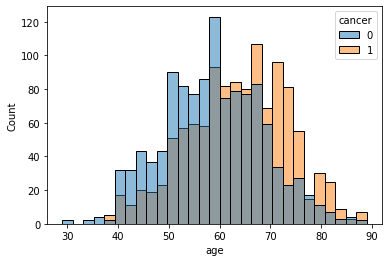

In [115]:
# Plot new dataframe distribution
sns.histplot(data=under_sample_df, x="age", hue="cancer")


In [116]:
# Store under sampled dataframe
under_sample_df.to_csv('../../data/under_sampling_train.csv', index=False)

In [117]:
# Create train, test, val sets for model
df_train, df_test = train_test_split(under_sample_df, random_state=42, test_size=0.3)

df_val, df_test = train_test_split(df_test, random_state=123, test_size=0.5)


In [118]:
# Check train after split cancer value counts for each classification
df_train["cancer"].value_counts()


1    810
0    808
Name: cancer, dtype: int64

In [119]:
# Check test after split cancer value counts for each classification
df_test["cancer"].value_counts()


0    178
1    169
Name: cancer, dtype: int64

In [120]:
# Store generated under sampled dataframe train test split
df_train.to_csv("../../data/under_train.csv", index=False)
df_val.to_csv("../../data/under_val.csv", index=False)
df_test.to_csv("../../data/under_test.csv", index=False)


---

Over Sampling


In [121]:
# Initialize Random Over Sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample using random over sampler
X_ros, y_ros = ros.fit_resample(X, y)

# Print before and after over sampling
print("Original dataset shape", Counter(y))
print("Resample dataset shape", Counter(y_ros))


Original dataset shape Counter({0: 53475, 1: 1156})
Resample dataset shape Counter({1: 53475, 0: 53475})


In [122]:
# Create dataframe after oversampling
over_sample_df = X_ros
over_sample_df["cancer"] = y_ros


<AxesSubplot: xlabel='age', ylabel='Count'>

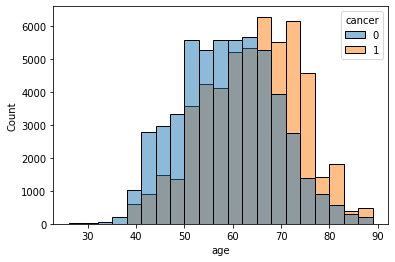

In [123]:
# Plot over sampling distribution
sns.histplot(data=over_sample_df, x="age", hue="cancer", binwidth=3)


In [124]:
# Store oversampling dataframe
over_sample_df.to_csv("../../data/over_sampling_train.csv", index=False)


In [125]:
# Train test split over sampled dataframe
df_train, df_test = train_test_split(over_sample_df, random_state=42, test_size=0.3)

df_val, df_test = train_test_split(df_test, random_state=123, test_size=0.5)


In [126]:
# Check train cancer classification split
df_train["cancer"].value_counts()


1    37462
0    37403
Name: cancer, dtype: int64

In [127]:
# Check test cancer classification split
df_test["cancer"].value_counts()


0    8089
1    7954
Name: cancer, dtype: int64

In [128]:
# Store over sampled dataframe
df_train.to_csv("../../data/over_train.csv", index=False)
df_val.to_csv("../../data/over_val.csv", index=False)
df_test.to_csv("../../data/over_test.csv", index=False)
